In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['1000genome-chameleon-2ch-100k-001.json',
'1000genome-chameleon-2ch-250k-001.json',
'1000genome-chameleon-4ch-100k-001.json',
'1000genome-chameleon-4ch-250k-001.json',
'1000genome-chameleon-6ch-100k-001.json',
'1000genome-chameleon-6ch-250k-001.json',
'1000genome-chameleon-8ch-100k-001.json',
'1000genome-chameleon-8ch-250k-001.json',
'1000genome-chameleon-10ch-100k-001.json',
'1000genome-chameleon-10ch-250k-001.json',
'1000genome-chameleon-12ch-100k-001.json',
'1000genome-chameleon-12ch-250k-001.json',
'1000genome-chameleon-14ch-100k-001.json',
'1000genome-chameleon-14ch-250k-001.json',
'1000genome-chameleon-16ch-100k-001.json',
'1000genome-chameleon-16ch-250k-001.json',
'1000genome-chameleon-18ch-100k-001.json',
'1000genome-chameleon-18ch-250k-001.json',
'1000genome-chameleon-20ch-100k-001.json',
'1000genome-chameleon-20ch-250k-001.json',
'1000genome-chameleon-22ch-100k-001.json',
'1000genome-chameleon-22ch-250k-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/1000genome/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

52
82
104
164
156
246
208
328
260
410
312
492
364
574
416
656
468
738
520
820
572
902


In [3]:
G_list[0]

In [8]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lb_ratio = []
ub_ratio = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3

for G in G_list[:5]:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    #d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)

    test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=False)

    # Initialize objective function value
    heuristic_opt = test.obj_value

    # Get pseudosize, convert to speed
    psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
    s_prime = psize_to_speed(psize)

    # Get ordering using modified ETF
    test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

    # Check if the objective function value has improved
    if heuristic_opt > test2.obj_value:
        heuristic_opt = test2.obj_value
        s = s_prime

    _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, test2.order, plot=plot, compare=False)
    d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    
    y.append(obj_opt)
    lb_ratio.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, test2.order)))
    ub_ratio.append(ub)
 

apm 104.5.118.159_gk_model11 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           57
   Constants    :            0
   Variables    :          991
   Intermediates:            0
   Connections  :          473
   Equations    :          726
   Residuals    :          726
 
 Number of state variables:            991
 Number of total equations: -          782
 Number of slack variables: -          463
 ---------------------------------------
 Degrees of freedom       :           -254
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model13 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :           87
   Constants    :            0
   Variables    :         1801
   Intermediates:            0
   Connections  :          743
   Equations    :         1386
   Residuals    :         1386
 
 Number of state variables:           1801
 Number of total equations: -         1472
 Number of slack variables: -          973
 ---------------------------------------
 Degrees of freedom       :           -644
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model15 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          109
   Constants    :            0
   Variables    :         1971
   Intermediates:            0
   Connections  :          941
   Equations    :         1446
   Residuals    :         1446
 
 Number of state variables:           1971
 Number of total equations: -         1554
 Number of slack variables: -          923
 ---------------------------------------
 Degrees of freedom       :           -506
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model17 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          169
   Constants    :            0
   Variables    :         3591
   Intermediates:            0
   Connections  :         1481
   Equations    :         2766
   Residuals    :         2766
 
 Number of state variables:           3591
 Number of total equations: -         2934
 Number of slack variables: -         1943
 ---------------------------------------
 Degrees of freedom       :          -1286
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

apm 104.5.118.159_gk_model19 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          161
   Constants    :            0
   Variables    :         2951
   Intermediates:            0
   Connections  :         1409
   Equations    :         2166
   Residuals    :         2166
 
 Number of state variables:           2951
 Number of total equations: -         2326
 Number of slack variables: -         1383
 ---------------------------------------
 Degrees of freedom       :           -758
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*************************************************************************

[389.1886607044873, 779.1061115887866, 1071.326195620372, 2170.245666026469, 1951.843391785396]


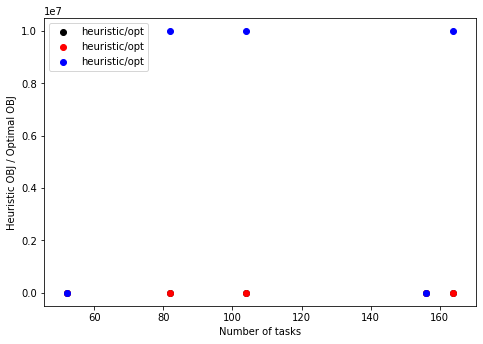

In [10]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ub_ratio, label='heuristic/opt', color='k')
plt.scatter(x, lb_ratio, label='heuristic/opt', color='r')
plt.scatter(x, y, label='heuristic/opt', color='b')
plt.xlabel('Number of tasks')
plt.ylabel('Heuristic OBJ / Optimal OBJ')
plt.legend()
plt.show()